##  1.Loading Dependencies

In [3]:
!pip install tensorflow==2.4.1 tensorflow-io matplotlib mlxtend

^C
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached jax-0.4.30-py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/272.9 MB 4.2 MB/s eta 0:01:05
   ---------------------------------------- 2.1/272

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\audiodata\audiodata\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\user\audiodata\audiodata\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\user\audiodata\audiodata\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1130, in read
    r

## 2. Test one audio of each class

In [3]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow_io as tfio

In [4]:
import tensorflow_io as tfio
print(tfio.__version__)

0.17.1


### 2.1 Create path

In [5]:
瑋階梯_file = os.path.join('A瑋鞋','瑋鞋 64.wav')
頻階梯_file = os.path.join('A瑋拖','瑋拖 37.wav')
others  = os.path.join('A襪子','襪子 1.wav')

### 2.2 Read file and resample the rate

In [6]:
def load_wav_16000(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav,axis = -1)                               
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000) #將採樣頻率轉成16000赫茲每秒降低計算量
    return wav

In [7]:
wave = load_wav_16000(瑋階梯_file)
nwave = load_wav_16000(頻階梯_file)
none = load_wav_16000(others)
print(len(none))

82944


In [8]:
print(wave)

tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.9107274e-05 1.3772470e-04
 6.1352075e-05], shape=(101717,), dtype=float32)


### 2.3 Plot the result

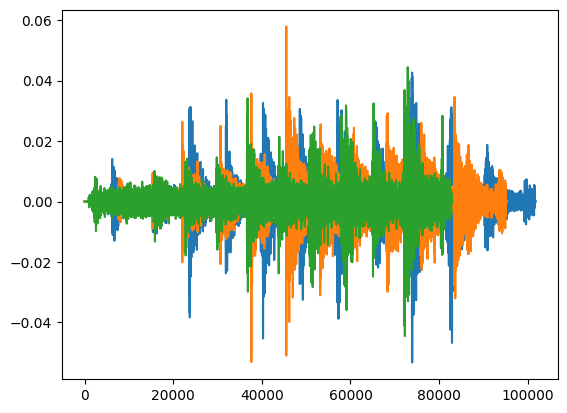

In [9]:
plt.plot(wave)
plt.plot(nwave)
plt.plot(none)
plt.show()

## 3. Prepare the Dataset

### 3.1 Split the data into Train, Validation, Testing Sets(Just Run Once)

In [56]:
ALL = os.path.join('ALL')
allf = tf.data.Dataset.list_files(ALL+'\*.wav')
allf.shuffle(buffer_size=2000)
for i in allf.as_numpy_iterator():
    i = i.decode()
    print(i)

ALL\volume_媽襪 91.wav
ALL\瑋拖 20.wav
ALL\媽襪 64.wav
ALL\noise_襪子 94.wav
ALL\媽鞋 114.wav
ALL\媽拖 97.wav
ALL\volume_瑋鞋 76.wav
ALL\瑋鞋 19.wav
ALL\襪子 102.wav
ALL\noise_媽鞋 116.wav
ALL\volume_襪子 56.wav
ALL\volume_瑋拖 118.wav
ALL\襪子 39.wav
ALL\volume_瑋鞋 43.wav
ALL\襪子 10.wav
ALL\volume_媽襪 35.wav
ALL\媽鞋 39.wav
ALL\noise_媽鞋 94.wav
ALL\volume_瑋鞋 16.wav
ALL\noise_媽鞋 22.wav
ALL\瑋拖 11.wav
ALL\volume_襪子 80.wav
ALL\noise_媽鞋 87.wav
ALL\noise_媽襪 2.wav
ALL\volume_媽襪 86.wav
ALL\媽襪 74.wav
ALL\volume_媽鞋 106.wav
ALL\volume_襪子 75.wav
ALL\瑋鞋 106.wav
ALL\noise_襪子 66.wav
ALL\noise_媽鞋 39.wav
ALL\媽襪 33.wav
ALL\volume_瑋拖 86.wav
ALL\volume_媽鞋 107.wav
ALL\媽襪 38.wav
ALL\noise_媽拖 66.wav
ALL\noise_襪子 45.wav
ALL\noise_媽鞋 91.wav
ALL\volume_襪子 27.wav
ALL\noise_瑋鞋 6.wav
ALL\noise_瑋拖 75.wav
ALL\襪子 93.wav
ALL\noise_媽襪 22.wav
ALL\volume_媽襪 103.wav
ALL\noise_瑋鞋 45.wav
ALL\襪子 53.wav
ALL\volume_媽拖 107.wav
ALL\volume_瑋鞋 89.wav
ALL\noise_媽襪 78.wav
ALL\volume_瑋拖 10.wav
ALL\noise_媽鞋 47.wav
ALL\volume_瑋鞋 117.wav
ALL\媽拖 57.wav
ALL\volume_瑋拖 1

In [57]:
# Split the data into training and testing sets
train_data = allf.take(1170) #65%
val_data = allf.skip(1170).take(450) #25%
test_data = allf.skip(1620).take(180) #10%
for ele in train_data.as_numpy_iterator():
    file_path = ele.decode()
    export_path = "train_data" +  file_path[3:]
    tf.io.gfile.copy(file_path, export_path)
    print(f"Successfully copy {file_path} to {export_path}")
for ele in val_data.as_numpy_iterator():
    file_path = ele.decode()
    export_path = "val_data" +  file_path[3:]
    tf.io.gfile.copy(file_path, export_path)
    print(f"Successfully copy {file_path} to {export_path}")
for ele in test_data.as_numpy_iterator():
    file_path = ele.decode()
    export_path = "test_data" +  file_path[3:]
    tf.io.gfile.copy(file_path, export_path)
    print(f"Successfully copy {file_path} to {export_path}")

Successfully copy ALL\noise_瑋鞋 11.wav to train_data\noise_瑋鞋 11.wav
Successfully copy ALL\noise_媽拖 104.wav to train_data\noise_媽拖 104.wav
Successfully copy ALL\noise_瑋鞋 46.wav to train_data\noise_瑋鞋 46.wav
Successfully copy ALL\noise_瑋拖 77.wav to train_data\noise_瑋拖 77.wav


AlreadyExistsError: file already exists

### 3.2 One hot label the data(可改良)

In [10]:
TRAIN = tf.data.Dataset.list_files("train_data"+'\*.wav')
VAL = tf.data.Dataset.list_files("val_data"+'\*.wav')
TEST = tf.data.Dataset.list_files("test_data"+'\*.wav')

In [11]:
def add_label(file_path):
    global dicts
    for i in dicts:
        decode_fp = file_path.decode()
        if i in decode_fp:
            return dicts[i]
#根據檔案數量創立對應數量標籤(瑋鞋:0,瑋拖:1,襪子:2,媽鞋:3,媽拖:4,媽襪:5)
dicts = {"瑋鞋":0,"瑋拖":1,"襪子":2,"媽鞋":3,"媽拖":4,"媽襪":5}
label_TR = []
for ele in TRAIN.as_numpy_iterator():
    label_TR.append(add_label(ele))
label_TR = tf.constant(label_TR)

label_VAL = []
for ele in VAL.as_numpy_iterator():
    label_VAL.append(add_label(ele))
label_VAL = tf.constant(label_VAL)

label_TT = []
for ele in TEST.as_numpy_iterator():
    label_TT.append(add_label(ele))
label_TT = tf.constant(label_TT)

In [12]:
TRAIN = tf.data.Dataset.zip((TRAIN, tf.data.Dataset.from_tensor_slices(tf.one_hot(label_TR, depth=6))))
VAL = tf.data.Dataset.zip((VAL, tf.data.Dataset.from_tensor_slices(tf.one_hot(label_VAL, depth=6))))
TEST = tf.data.Dataset.zip((TEST, tf.data.Dataset.from_tensor_slices(tf.one_hot(label_TT, depth=6)))) 

### 3.2 Find the best length (Used in 4.)


In [13]:
file_path = ['A瑋鞋','A瑋拖','A襪子','A媽鞋','A媽拖','A媽襪']
all_length = []
for i in range(len(file_path)):
    temp_length = []
    for file in os.listdir(os.path.join(file_path[i])):
        if file.endswith(".wav"):
            tensor_wave = load_wav_16000(os.path.join(file_path[i], file))
            temp_length.append(len(tensor_wave))
    all_length.append(temp_length)

KeyboardInterrupt: 

In [ ]:
for lengths in all_length:
    print(lengths)

In [ ]:
tf.math.reduce_mean(all_length[0])
#tf.math.reduce_min(all_length[0])
#tf.math.reduce_max(all_length[0])

In [18]:
tf.math.reduce_mean(all_length[1])
#tf.math.reduce_min(all_length[1])
#tf.math.reduce_max(all_length[1])

<tf.Tensor: shape=(), dtype=int32, numpy=98076>

In [19]:
tf.math.reduce_mean(all_length[2])
#tf.math.reduce_min(all_length[2])
#tf.math.reduce_max(all_length[2])

<tf.Tensor: shape=(), dtype=int32, numpy=91495>

## 4. Data preprocessing

### 4.1 Build the stft function

In [14]:
def preprocess(file_path, label): 
    wav = load_wav_16000(file_path)
    wav = wav[:90000]
    zero_padding = tf.zeros([90000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32) #frame_length窗口長度,frame_step步長
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label 

### 4.2 Showing the spectrogram of one of the classes

In [15]:
filepath, label = TRAIN.as_numpy_iterator().next()

In [16]:
spectrogram, label = preprocess(filepath, label)
spectrogram.shape

TensorShape([2803, 257, 1])

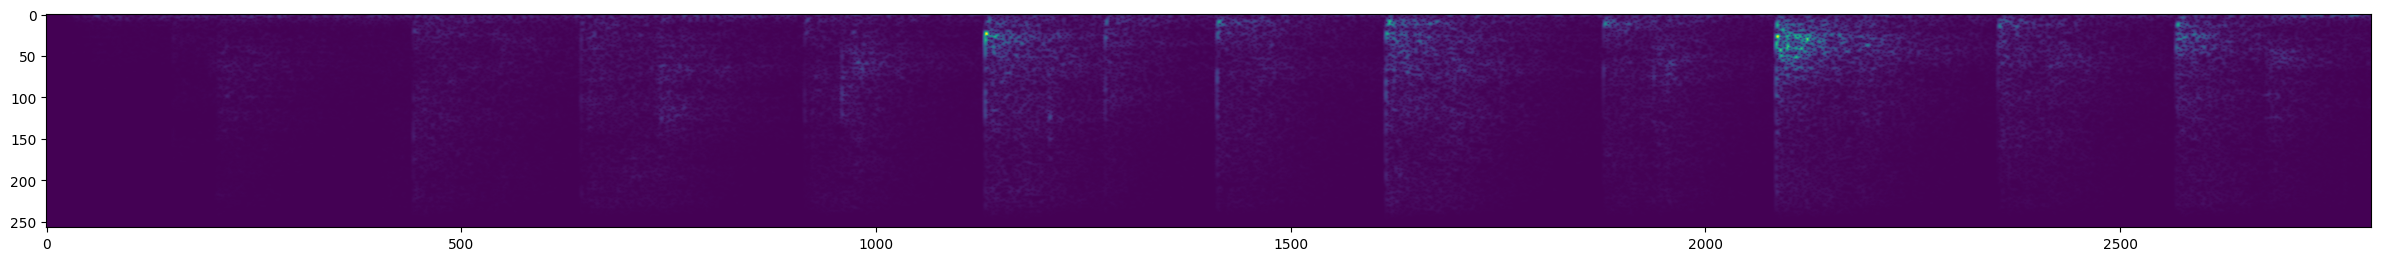

In [17]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### 4.3 Preprocess all data 

In [18]:
def preprocess_batched(dataset, batch_size=32, prefetch=16):
    dataset = dataset.map(preprocess)
    dataset = dataset.cache()
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(prefetch)
    return dataset

In [19]:
TRAIN = preprocess_batched(TRAIN)
VAL = preprocess_batched(VAL)
TEST = preprocess_batched(TEST)

In [20]:
samples, labels = TRAIN.as_numpy_iterator().next()

In [21]:
samples.shape #confirm the shape of each batch

(32, 2803, 257, 1)

## 5. Build and compile the model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D,Dropout

In [23]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(2803, 257,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) #這裡要改成softmax，前面的數字對應class的數量

In [24]:
#loss 改成categorical_crossentropy，其他大致一樣
model.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2801, 255, 16)     160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1400, 127, 16)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1398, 125, 16)     2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 699, 62, 16)       0         
_________________________________________________________________
flatten (Flatten)            (None, 693408)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               88756352  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

## 6. Train the model

In [26]:
hist = model.fit(TRAIN, epochs=6, validation_data=VAL)

Epoch 1/2
37/37 [==============================] - 229s 6s/step - loss: 3.0325 - accuracy: 0.1709 - val_loss: 1.7917 - val_accuracy: 0.1533
Epoch 2/2
37/37 [==============================] - 201s 5s/step - loss: 1.7901 - accuracy: 0.2102 - val_loss: 1.7890 - val_accuracy: 0.1600


## 7. Check result

In [27]:
hist.history

{'loss': [2.315192699432373, 1.790767788887024],
 'accuracy': [0.17802384495735168, 0.18739353120326996],
 'val_loss': [1.791731357574463, 1.788987636566162],
 'val_accuracy': [0.15333333611488342, 0.1599999964237213]}

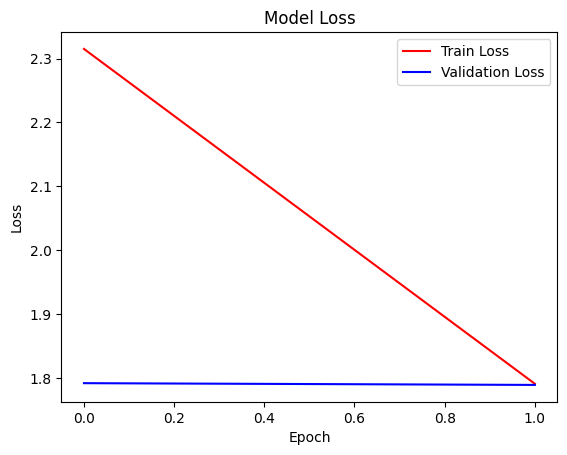

In [28]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss','Validation Loss'], loc='upper right')
plt.show()

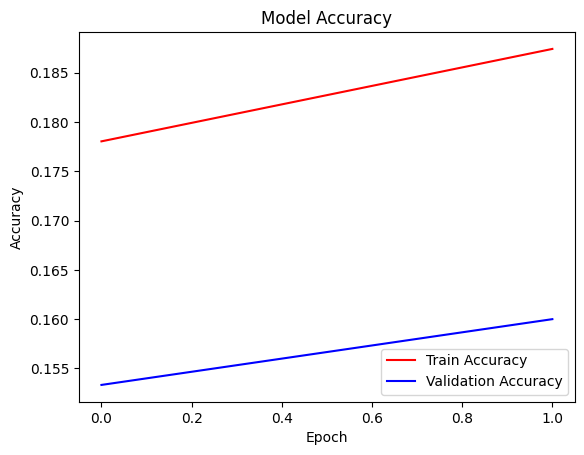

In [29]:
plt.title('Precision')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Validation Accuracy'], loc='lower right')
plt.show()

## 8. Evaluate the model

In [30]:
x_TEST, y_TEST = TEST.as_numpy_iterator().next()

In [31]:
x_TEST.shape

(32, 2803, 257, 1)

In [32]:
#察看結果
test_loss, test_acc,= model.evaluate(x_TEST,  y_TEST, verbose=2)

1/1 - 1s - loss: 1.8137 - accuracy: 0.0312


In [33]:
import numpy as np
y_pred = model.predict(x_TEST)
print(np.argmax(y_pred,axis=1))
print(y_TEST)

[5 3 5 1 1 1 1 3 3 3 5 3 3 5 3 1 1 1 3 3 3 1 3 1 1 5 3 3 1 3 3 1]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


## 9. Print the Confusion Matrix of Test Set and Train Set

### 9.1 Validation Set

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

In [35]:
x_validation, y_validation = [], []
for x, y in VAL: 
    x_validation.append(x.numpy())
    y_validation.append(y.numpy())
x_validation = np.concatenate(x_validation)
y_validation = np.concatenate(y_validation)

y_predval = np.argmax(model.predict(x_validation), axis=1)
y_validation = np.argmax(y_validation, axis=1)

C:\Users\user\anaconda3\envs\audioCNN\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:94: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

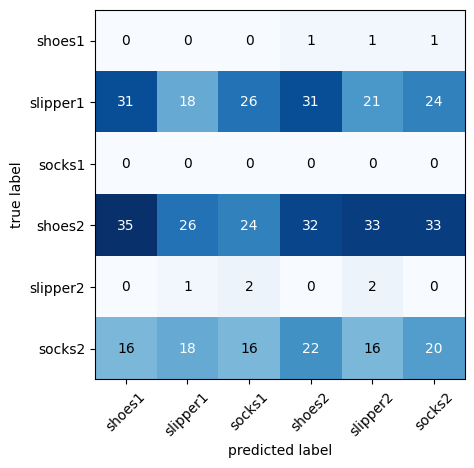

In [36]:
class_names = ['shoes1','slipper1','socks1','shoes2','slipper2','socks2',]
mat_val = confusion_matrix(y_predval, y_validation)
plot_confusion_matrix(conf_mat=mat_val,class_names = class_names)

### 9.2 Test Set

In [37]:
x_test, y_test = [], []
for x, y in TEST: 
    x_test.append(x.numpy())
    y_test.append(y.numpy())
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

y_predtt = np.argmax(model.predict(x_test), axis=1)
y_test = np.argmax(y_test, axis=1)

In [38]:
y_test
y_predtt

array([3, 1, 5, 1, 3, 3, 3, 3, 3, 3, 5, 1, 1, 1, 1, 5, 5, 4, 3, 1, 3, 1,
       1, 3, 5, 1, 3, 1, 3, 1, 1, 1, 5, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 0,
       1, 1, 1, 5, 1, 1, 3, 5, 3, 5, 3, 3, 1, 0, 3, 3, 3, 0, 1, 1, 5, 5,
       3, 2, 3, 1, 3, 1, 5, 1, 1, 5, 3, 1, 3, 3, 1, 1, 5, 1, 1, 1, 3, 5,
       3, 1, 3, 3, 3, 1, 5, 3, 5, 1, 1, 5, 1, 3, 3, 1, 1, 5, 1, 1, 1, 1,
       5, 3, 3, 1, 1, 3, 1, 1, 5, 5, 5, 1, 1, 3, 3, 1, 3, 5, 1, 3, 3, 3,
       3, 1, 4, 3, 1, 1, 3, 5, 5, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 5, 3, 1, 3, 1, 3, 3, 1, 3, 1, 4, 5, 1, 3, 3, 3, 1, 3, 3, 5, 1,
       1, 3, 1, 1], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

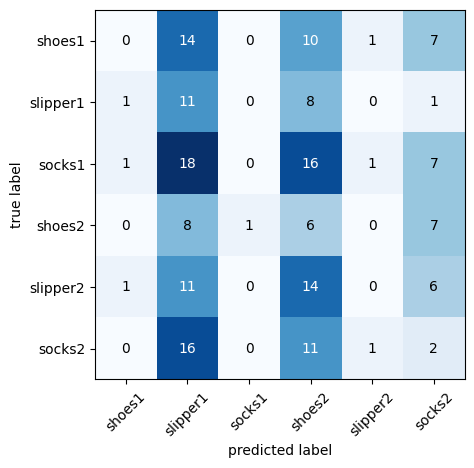

In [39]:
mat_test = confusion_matrix(y_test, y_predtt)
plot_confusion_matrix(conf_mat=mat_test,class_names = class_names)
#plt.figure()
#plt.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title('Confusion Matrix')
#plt.colorbar()
#plt.tight_layout()
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#plt.show()

## 10. Save the Model

In [37]:
model.save('./(各全5T)multiclass_audio_model.h5')  #名字可調整
del model

## 11. Import the model (以下待修改)

In [45]:
myModel = tf.keras.models.load_model('./multiclass_audio_model.h5')

In [47]:
result = {}
瑋階梯_file, label = preprocess(os.path.join('瑋階梯','瑋 67.wav'), 1)
瑋階梯_file = tf.expand_dims(瑋階梯_file, 0)
瑋階梯_file.shape
rhat = myModel.predict(瑋階梯_file)
#rhat = [1 if prediction > 0.5 else 0 for prediction in rhat]
result['瑋 67.wav'] = rhat

1/1 [==============================] - 0s 401ms/step


In [48]:
print(result)

{'瑋 67.wav': array([[9.9878150e-01, 5.5568665e-04, 6.6279009e-04]], dtype=float32)}
